# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

637

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
query_url = "http://api.openweathermap.org/data/2.5/weather?appid="+weather_api_key+"&q="

Cityname = []
Lat = []
Long = []
MaxTemp = []
Humid = []
Cloud = []
WindSpeed = []
Country = []
Date = []
 
for city in cities:
    response = requests.get(query_url+city).json()
  
    try:
        Cityname.append(response['name'])
        Lat.append(response['coord']['lat'])
        Long.append(response['coord']['lon'])
        MaxTemp.append(response['main']['temp_max'])
        Humid.append(response['main']['humidity'])
        Cloud.append(response['clouds']['all'])
        WindSpeed.append(response['wind']['speed'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
    except:
        next
        

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
response = requests.get(query_url+city).json()
response

{'coord': {'lon': -80.75, 'lat': 32.22},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'base': 'stations',
 'main': {'temp': 305.88,
  'feels_like': 311.11,
  'temp_min': 305.15,
  'temp_max': 307.04,
  'pressure': 1018,
  'humidity': 70},
 'visibility': 10000,
 'wind': {'speed': 3.1, 'deg': 120},
 'clouds': {'all': 40},
 'dt': 1598471699,
 'sys': {'type': 1,
  'id': 4449,
  'country': 'US',
  'sunrise': 1598439293,
  'sunset': 1598486092},
 'timezone': -14400,
 'id': 4581833,
 'name': 'Hilton Head',
 'cod': 200}

In [5]:
#Making sure that all lists are filled
print(len(Cityname))
print(len(Lat))
print(len(Long))
print(len(MaxTemp))
print(len(Humid))
print(len(Cloud))
print(len(WindSpeed))
print(len(Country))
print(len(Date))

587
587
587
587
587
587
587
587
587


In [6]:
citiesinfo= pd.DataFrame({
    "City" : Cityname,
    "Latitude" : Lat,
    "Longitude" : Long,
    "Max Temp" : MaxTemp,
    "Humidity" : Humid,
    "Cloudiness" : Cloud,
    "Wind Speed" : WindSpeed,
    "Country" : Country,
    "Date" : Date,
})

citiesinfo.to_csv("output/cities.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
toomuchhumidity =citiesinfo.loc[citiesinfo["Humidity"] > 100]
toomuchhumidity

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [8]:
citiesinfo.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cape Town,-33.93,18.42,287.59,62,0,3.10,ZA,1598471286
1,Carnarvon,-24.87,113.63,290.15,77,0,6.20,AU,1598471649
2,Ushuaia,-54.80,-68.30,279.15,52,40,1.50,AR,1598471649
3,Severo-Kuril'sk,50.68,156.12,285.09,90,100,6.89,RU,1598471117
4,Hong Kong,22.29,114.16,300.93,88,40,1.00,HK,1598471649


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0.5, 0, 'Latitude')

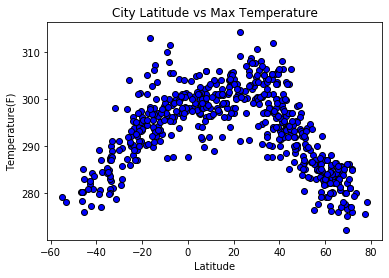

In [16]:
xaxis=citiesinfo["Latitude"]
yaxis=citiesinfo["Max Temp"]
plt.scatter(xaxis,yaxis, edgecolor = "black",c="blue")
plt.title("City Latitude vs Max Temperature")
plt.ylabel("Temperature(F)")
plt.xlabel("Latitude")

In [10]:
#The further a city is from the equator, the more likely it is to be colder.
# The highest temperatures seem to be found from 20°-40° latitude

## Latitude vs. Humidity Plot

Text(0.5, 0, 'Latitude')

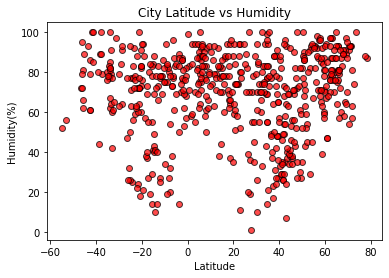

In [14]:
xaxis=citiesinfo["Latitude"]
yaxis=citiesinfo["Humidity"]
plt.scatter(xaxis,yaxis, edgecolor = "black", c="red", alpha =.70)
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")

In [15]:
#The closer the city is to the equator, there less of a chance for low humidity.

## Latitude vs. Cloudiness Plot

Text(0.5, 0, 'Latitude')

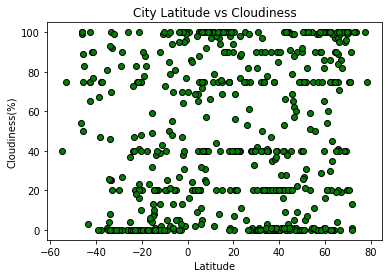

In [17]:
xaxis=citiesinfo["Latitude"]
yaxis=citiesinfo["Cloudiness"]
plt.scatter(xaxis,yaxis, edgecolor = "black",c="green")
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")

In [18]:
#There does not seem to be a relationship between latitude and cloudiness

## Latitude vs. Wind Speed Plot

Text(0.5, 0, 'Latitude')

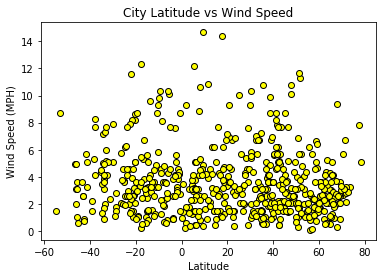

In [19]:
xaxis=citiesinfo["Latitude"]
yaxis=citiesinfo["Wind Speed"]
plt.scatter(xaxis,yaxis, edgecolor = "black",c="Yellow")
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")

In [20]:
#There does not seem to be a relationship between Latitude and Wind Speed

In [21]:
citiesinfo

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cape Town,-33.93,18.42,287.59,62,0,3.10,ZA,1598471286
1,Carnarvon,-24.87,113.63,290.15,77,0,6.20,AU,1598471649
2,Ushuaia,-54.80,-68.30,279.15,52,40,1.50,AR,1598471649
3,Severo-Kuril'sk,50.68,156.12,285.09,90,100,6.89,RU,1598471117
4,Hong Kong,22.29,114.16,300.93,88,40,1.00,HK,1598471649
...,...,...,...,...,...,...,...,...,...
582,Kununurra,-15.77,128.73,292.15,29,49,3.10,AU,1598471698
583,Morant Bay,17.88,-76.41,301.48,78,75,14.40,JM,1598471698
584,Whithorn,18.26,-78.04,304.26,83,75,4.60,JM,1598471698
585,Carquefou,47.30,-1.49,290.37,77,60,1.50,FR,1598471699


## Linear Regression

In [22]:
# OPTIONAL: Create a function to create Linear Regression plots

def linreg_N():
    x_values = North["Latitude"]
    col = input("choose the column name you need to work with ")
    y_values = North[col]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(6,10),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(col)
    plt.title(f"{col} VS Latitude (NORTH)")
    plt.show()
    
def linreg_S():
    x_values = South["Latitude"]
    col = input("choose the column name you need to work with ")
    y_values = South[col]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(6,10),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(col)
    plt.title(f"{col} VS Latitude (SOUTH)")
    plt.show()

In [23]:
# Create Northern and Southern Hemisphere DataFrames
North = citiesinfo.loc[citiesinfo["Latitude"] >= 0]
South = citiesinfo.loc[citiesinfo["Latitude"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

choose the column name you need to work with Max Temp


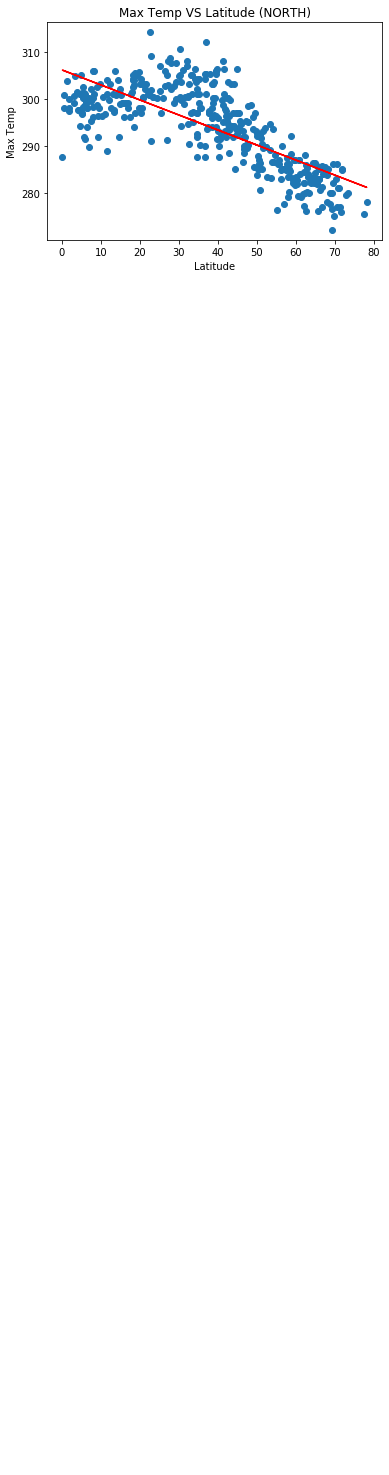

In [24]:
linreg_N()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

choose the column name you need to work with Max Temp


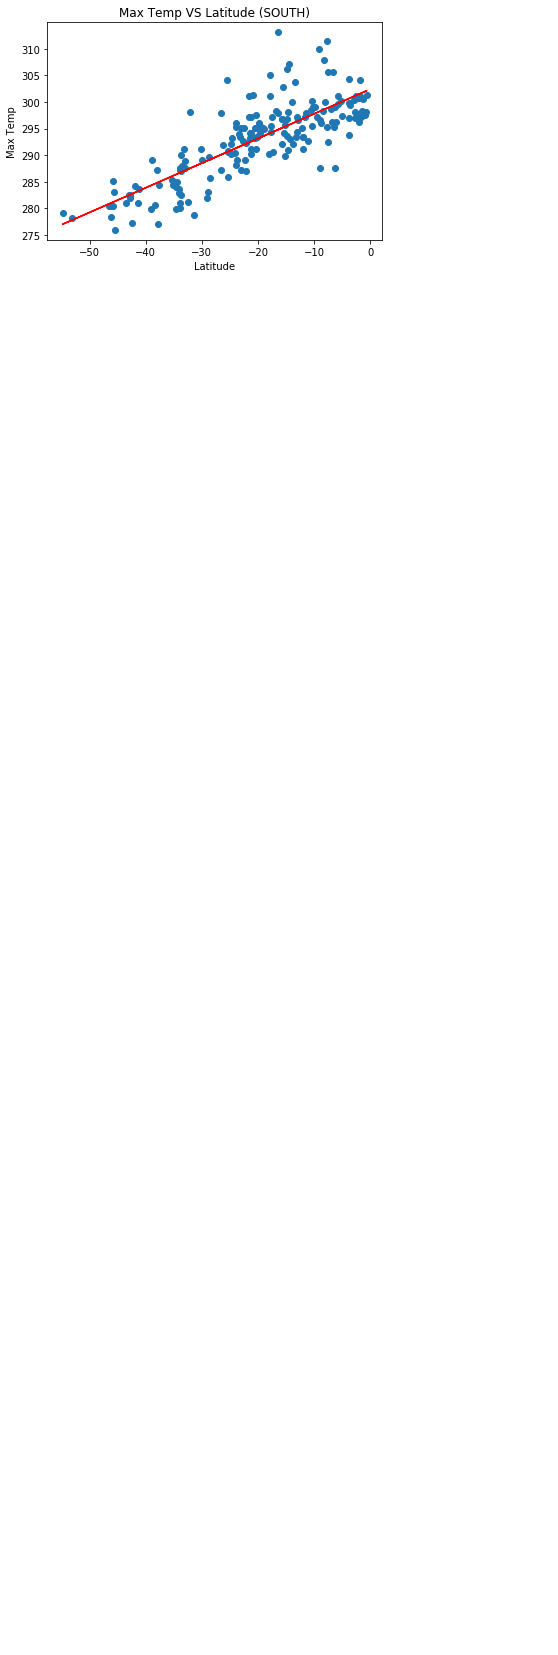

In [25]:
linreg_S()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

choose the column name you need to work with Humidity


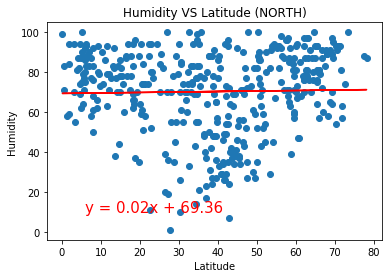

In [26]:
linreg_N()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

choose the column name you need to work with Humidity


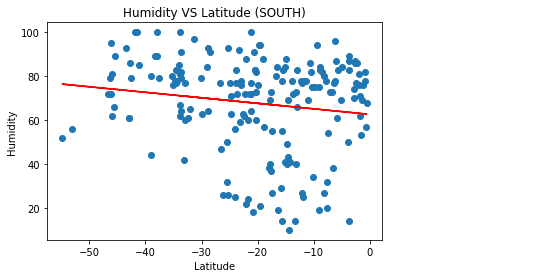

In [27]:
linreg_S()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

choose the column name you need to work with Cloudiness


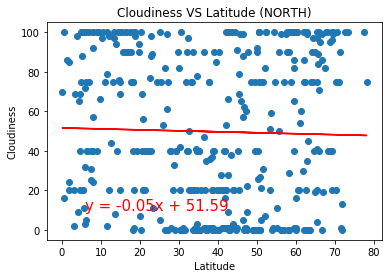

In [28]:
linreg_N()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

choose the column name you need to work with Cloudiness


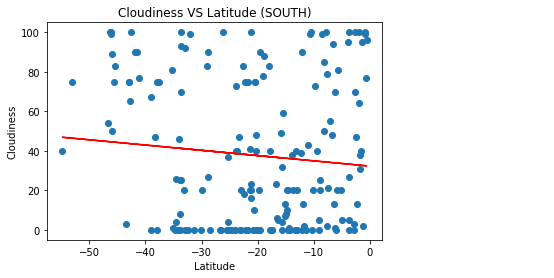

In [29]:
linreg_S()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

choose the column name you need to work with Wind Speed


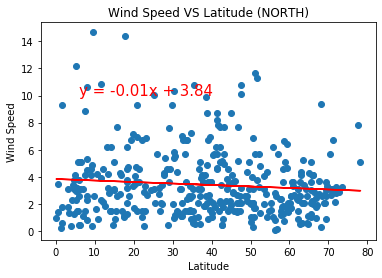

In [30]:
linreg_N()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

choose the column name you need to work with Wind Speed


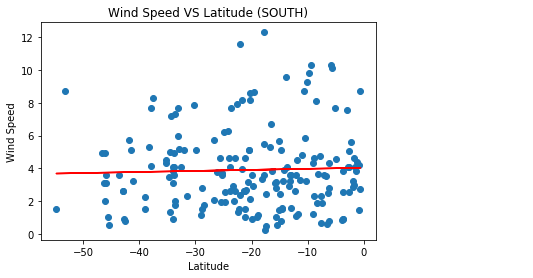

In [31]:
linreg_S()